<h1> Battle of Neighborhoods- Capstone Project<br><h3> Data Analysis using Machine Learning algorithms and Foursqaure API to choose best place or city to establish food chain business in North India.<br><h4> Created By: Prateek Vashishtha  <br>Start Date: 07 June 2019

<h3> Importing Required Modules

In [3]:
!conda install -c conda-forge folium=0.5.0 --yes
#!conda install seaborn
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

In [4]:
address = 'New Delhi, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New Delhi are 28.6141793, 77.2022662.


In [5]:
# create map of New York using latitude and longitude values
map_delhi = folium.Map(location=[latitude, longitude], zoom_start=10)
map_delhi

In [6]:
import json

In [7]:
CLIENT_ID = 'KEW0QGAUCDX2EUWJSVB4JO45JB20GGDW3ZID1YXFDR2V3EMQ' # your Foursquare ID
CLIENT_SECRET = 'ETNUWSZXOMNIICV3IO2AKU5JTXOXBLMTPOEKKDB4GI1TFHFE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KEW0QGAUCDX2EUWJSVB4JO45JB20GGDW3ZID1YXFDR2V3EMQ
CLIENT_SECRET:ETNUWSZXOMNIICV3IO2AKU5JTXOXBLMTPOEKKDB4GI1TFHFE


In [8]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 50000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=KEW0QGAUCDX2EUWJSVB4JO45JB20GGDW3ZID1YXFDR2V3EMQ&client_secret=ETNUWSZXOMNIICV3IO2AKU5JTXOXBLMTPOEKKDB4GI1TFHFE&v=20180605&ll=28.6141793,77.2022662&radius=50000&limit=100'

In [12]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d008de423bb8e0038daa609'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4bc8f2c7762beee1a8bb3d38-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1fa931735',
         'name': 'Hotel',
         'pluralName': 'Hotels',
         'primary': True,
         'shortName': 'Hotel'}],
       'id': '4bc8f2c7762beee1a8bb3d38',
       'location': {'address': 'Janpath',
        'cc': 'IN',
        'city': 'New Delhi',
        'country': 'India',
        'distance': 2041,
        'formattedAddress': ['Janpath', 'New Delhi 110001', 'Delhi', 'India'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 28.625548038159426,
          'lng': 77.21866351780929}],
 

In [13]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [14]:
from pandas.io.json import json_normalize

In [15]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name      categories        lat        lng
0        The Imperial           Hotel  28.625548  77.218664
1               Tamra      Restaurant  28.620543  77.218174
2         Pandey Paan      Smoke Shop  28.622249  77.201075
3  Naturals Ice Cream  Ice Cream Shop  28.634455  77.222139
4    The Leela Palace           Hotel  28.579923  77.189291

In [16]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
delhi_venues = getNearbyVenues(names=nearby_venues['name'],
                                   latitudes=nearby_venues['lat'],
                                   longitudes=nearby_venues['lng']
                                  )

The Imperial
Tamra
Pandey Paan
Naturals Ice Cream
The Leela Palace
Indian Accent
Lodhi Gardens (लोधी बाग़) (Lodhi Gardens)
Varq | वर्क
Humayun’s Tomb | हुमायूँ का मकबरा (Humayun’s Tomb)
The Lodhi Hotel
The Big Chill Cafe
Jamavar Kashmiri Restaurant @ The Leela
Amour Bistro
ITC Maurya
Connaught Place | कनॉट प्लेस (Connaught Place)
Gulati Restaurant
Delhi Golf Club
HOTEL SARAVANA BHAVAN
le meridian ,new delhi
Khan Market | खान मार्केट (Khan Market)
Blue Bar
L'Opera
Gurudwara Sri Rakabganj Sahibji
SODABOTTLEOPENERWALA
Lantern's
Wenger's
Hauz Khas Village
Cafe Coffee Day
Perch
The Oberoi
PCO
Taj Palace Hotel
The Big Chill Cafe
Starbucks Coffee
Sagar Ratna
Big Yellow Door
Olive Bar & Kitchen
The Claridges
Fitness First Platinum, Select City Walk
PVR Director's Cut
Select Citywalk
Sevilla
HOTEL SARAVANA BHAVAN
The Big Chill Cafe
Qutub Minar | क़ुतुब मीनार (Qutub Minar)
Élan @ The Lodhi
National Gallery Of Modern Art | राष्ट्रीय आधुनिक कला दीर्घा
Maxims
Imperfecto
Library Bar
Kainoosh
Nationa

In [19]:
delhi_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  The Imperial              28.625548               77.218664   
1  The Imperial              28.625548               77.218664   
2  The Imperial              28.625548               77.218664   
3  The Imperial              28.625548               77.218664   
4  The Imperial              28.625548               77.218664   

                         Venue  Venue Latitude  Venue Longitude  \
0                 The Imperial       28.625548        77.218664   
1        HOTEL SARAVANA BHAVAN       28.627041        77.219514   
2  The Square, Cafe Coffee Day       28.626640        77.219288   
3              The Spice Route       28.625577        77.218065   
4                         1911       28.625531        77.218715   

             Venue Category  
0                     Hotel  
1   South Indian Restaurant  
2                      Café  
3          Asian Restaurant  
4  Mediterranean Restaurant

In [22]:
delhi_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Amar Jawan Jyoti | अमर जवान ज्योति (Amar Jawan ...                      7   
Ambience Mall                                                          47   
Amour Bistro                                                           11   
Bengali Market | बंगाली मार्केट | বাংলা বাজার                          15   
Big Chill                                                              47   
Big Yellow Door                                                        14   
Blue Bar                                                               32   
Blue Tokai Coffee Roasters                                             10   
Cafe Coffee Day                                                        32   
Café Lota                                                               8   
Coast Cafe                                                             51   
Connaught Place | कनॉट प्लेस (Connaught Place)                         60   
DLF Emporio                                                            47   
DLF Promenade                                                          47   
Delhi Golf Club                                                         9   
Diggin                                                                 11   
Dum Pukht                                                              32   
Farzi Cafe                                                             58   
Fitness First Platinum, Select City Walk                               77   
Gulati Restaurant                                                      16   
Gung The Palace                                                        34   
Gurudwara Sri Rakabganj Sahibji                                         2   
HOTEL SARAVANA BHAVAN                                                  88   
Hard Rock Cafe New Delhi                                               74   
Hauz Khas Village                                                      47   
Haveli Dharampura                                                      17   
Hawkers                                                                 6   
Humayun’s Tomb | हुमायूँ का मकबरा (Humayun’s Tomb)                      7   
ITC Maurya                                                             32   
Imperfecto                                                             49   
...                                                                   ...   
Roseate House                                                          24   
Route 04                                                               57   
SODABOTTLEOPENERWALA                                                   45   
Sagar Ratna                                                            48   
Select Citywalk                                                        77   
Sevilla                                                                10   
Shalom                                                                 19   
Shangri-La's - Eros Hotel                                              27   
Smoke House Deli                                                       47   
South Campus, DU                                                        2   
Starbucks                                                              53   
Starbucks Coffee                                                       79   
Swaminarayan Akshardham                                                 2   
Taj Palace Hotel                                                       32   
Tamra                                                                  26   
Thai High                                                               7   
The Big Chill Cafe                                                    133   
The Claridges                                                           9   
The Imperial                                                           26   
The Leela Palace                                

In [89]:
delhi_ir=delhi_venues[delhi_venues['Venue Category'].isin(['Restarant','Indian Restaurant','South Indian Restaurant','Chinese Restaurant','Italian Restaurant'])]

In [90]:
map_delhi_ir = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(delhi_ir['Venue Latitude'], delhi_ir['Venue Longitude'], delhi_ir['Venue'], delhi_ir['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi_ir)
    
map_delhi_ir

In [91]:
delhi_venues2=delhi_venues[['Venue','Venue Latitude','Venue Longitude','Venue Category']]

In [260]:
delhi_venues2['CLat']=latitude
delhi_venues2['CLon']=longitude

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [93]:
delhi_venues2.head()

Venue  Venue Latitude  Venue Longitude  \
0                 The Imperial       28.625548        77.218664   
1        HOTEL SARAVANA BHAVAN       28.627041        77.219514   
2  The Square, Cafe Coffee Day       28.626640        77.219288   
3              The Spice Route       28.625577        77.218065   
4                         1911       28.625531        77.218715   

             Venue Category       CLat       CLon  
0                     Hotel  28.614179  77.202266  
1   South Indian Restaurant  28.614179  77.202266  
2                      Café  28.614179  77.202266  
3          Asian Restaurant  28.614179  77.202266  
4  Mediterranean Restaurant  28.614179  77.202266

In [94]:
from math import radians, sin, cos, acos
distance=list()
for lat1, lon1, lat2, lon2 in zip(delhi_venues2['CLat'],delhi_venues2['CLon'],delhi_venues2['Venue Latitude'],delhi_venues2['Venue Longitude']):
    slat = radians(lat1)
    slon = radians(lon1)
    elat = radians(lat2)
    elon = radians(lon2)
    dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
    distance.append(dist)


In [95]:
distance=["%.2f" %num for num in distance] 

In [96]:
delhi_venues['Distance From Centre']=distance

In [97]:
delhi_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  The Imperial              28.625548               77.218664   
1  The Imperial              28.625548               77.218664   
2  The Imperial              28.625548               77.218664   
3  The Imperial              28.625548               77.218664   
4  The Imperial              28.625548               77.218664   

                         Venue  Venue Latitude  Venue Longitude  \
0                 The Imperial       28.625548        77.218664   
1        HOTEL SARAVANA BHAVAN       28.627041        77.219514   
2  The Square, Cafe Coffee Day       28.626640        77.219288   
3              The Spice Route       28.625577        77.218065   
4                         1911       28.625531        77.218715   

             Venue Category Distance From Centre  
0                     Hotel                 2.04  
1   South Indian Restaurant                 2.21  
2                      Café                 2.16  
3          Asian Restaurant                 2.00  
4  Mediterranean Restaurant                 2.04

In [ ]:
delhi_venues['Distance From Centre']=pd.to_numeric(delhi_venues['Distance From Centre'])

In [132]:
delhi_ir=delhi_venues[delhi_venues['Venue Category'].isin(['Restarant','Indian Restaurant','South Indian Restaurant','Chinese Restaurant','Italian Restaurant'])]

In [204]:
map_delhi_ir=folium.Map(location=[latitude, longitude], zoom_start=12)
for lat, lng, borough, neighborhood in zip(delhi_ir['Venue Latitude'], delhi_ir['Venue Longitude'], delhi_ir['Venue'], delhi_ir['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        key_on=delhi_ir['Neighborhood'],
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi_ir)
map_delhi_ir

In [190]:
delhi_venues_upto2=delhi_ir[delhi_ir['Distance From Centre']<=2.00]

In [191]:
v2=delhi_venues_upto2.groupby('Neighborhood')['Neighborhood'].count().sum()

In [192]:
delhi_venues_upto4=delhi_ir[delhi_ir['Distance From Centre']<=4.00]

In [193]:
v4=delhi_venues_upto4.groupby('Neighborhood')['Neighborhood'].count().sum()

In [194]:
delhi_venues_6more=delhi_ir[delhi_ir['Distance From Centre']<=6.00]

In [195]:
v6=delhi_venues_6more.groupby('Neighborhood')['Neighborhood'].count().sum()

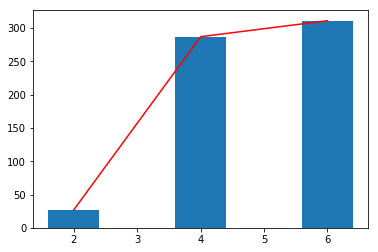

In [197]:
plt.bar([2,4,6],[v2,v4,v6])
plt.plot([2,4,6],[v2,v4,v6],'r')
plt.show()

In [254]:
map_delhi_ir=folium.Map(location=[latitude, longitude], zoom_start=12)

folium.Circle(
        [latitude,longitude],
        radius=6000,
        popup='6 KM Circle Area from Centre Point in New Delhi',
        color='blue',
        key_on=delhi_ir['Neighborhood'],
        fill=True,
        fill_color='yellow',
        fill_opacity=0.2,
        parse_html=False).add_to(map_delhi_ir)
for lat, lng, borough, neighborhood in zip(delhi_ir['Venue Latitude'], delhi_ir['Venue Longitude'], delhi_ir['Venue'], delhi_ir['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        key_on=delhi_ir['Neighborhood'],
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi_ir)
map_delhi_ir

In [256]:
x=delhi_ir[delhi_ir['Neighborhood']=='Sevilla']['Neighborhood Latitude']
y=delhi_ir[delhi_ir['Neighborhood']=='Sevilla']['Neighborhood Longitude']

array([1202])

In [284]:
delhi_venues2['CLat']=x[1202]
delhi_venues2['CLon']=y[1202]

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [285]:
delhi_venues2.head()

Venue  Venue Latitude  Venue Longitude  \
0                 The Imperial       28.625548        77.218664   
1        HOTEL SARAVANA BHAVAN       28.627041        77.219514   
2  The Square, Cafe Coffee Day       28.626640        77.219288   
3              The Spice Route       28.625577        77.218065   
4                         1911       28.625531        77.218715   

             Venue Category       CLat       CLon  
0                     Hotel  28.601144  77.216174  
1   South Indian Restaurant  28.601144  77.216174  
2                      Café  28.601144  77.216174  
3          Asian Restaurant  28.601144  77.216174  
4  Mediterranean Restaurant  28.601144  77.216174

In [286]:
from math import radians, sin, cos, acos
distance=list()
for lat1, lon1, lat2, lon2 in zip(delhi_venues2['CLat'],delhi_venues2['CLon'],delhi_venues2['Venue Latitude'],delhi_venues2['Venue Longitude']):
    slat = radians(lat1)
    slon = radians(lon1)
    elat = radians(lat2)
    elon = radians(lon2)
    dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
    distance.append(dist)


In [287]:
distance=["%.2f" %num for num in distance] 

In [288]:
delhi_venues['Distance From Centre']=distance

In [289]:
delhi_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  The Imperial              28.625548               77.218664   
1  The Imperial              28.625548               77.218664   
2  The Imperial              28.625548               77.218664   
3  The Imperial              28.625548               77.218664   
4  The Imperial              28.625548               77.218664   

                         Venue  Venue Latitude  Venue Longitude  \
0                 The Imperial       28.625548        77.218664   
1        HOTEL SARAVANA BHAVAN       28.627041        77.219514   
2  The Square, Cafe Coffee Day       28.626640        77.219288   
3              The Spice Route       28.625577        77.218065   
4                         1911       28.625531        77.218715   

             Venue Category Distance From Centre  
0                     Hotel                 2.72  
1   South Indian Restaurant                 2.90  
2                      Café                 2.85  
3          Asian Restaurant                 2.72  
4  Mediterranean Restaurant                 2.72

In [290]:
delhi_venues['Distance From Centre']=pd.to_numeric(delhi_venues['Distance From Centre'])

In [291]:
delhi_ir=delhi_venues[delhi_venues['Venue Category'].isin(['Restarant','Indian Restaurant','South Indian Restaurant','Chinese Restaurant','Italian Restaurant'])]

In [292]:
map_delhi_ir=folium.Map(location=[latitude, longitude], zoom_start=12)
for lat, lng, borough, neighborhood in zip(delhi_ir['Venue Latitude'], delhi_ir['Venue Longitude'], delhi_ir['Venue'], delhi_ir['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        key_on=delhi_ir['Neighborhood'],
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi_ir)
map_delhi_ir

In [293]:
delhi_venues_upto2=delhi_ir[delhi_ir['Distance From Centre']<=2.00]

In [294]:
v2=delhi_venues_upto2.groupby('Neighborhood')['Neighborhood'].count().sum()

In [295]:
delhi_venues_upto4=delhi_ir[delhi_ir['Distance From Centre']<=4.00]

In [296]:
v4=delhi_venues_upto4.groupby('Neighborhood')['Neighborhood'].count().sum()

In [297]:
delhi_venues_6more=delhi_ir[delhi_ir['Distance From Centre']<=6.00]

In [298]:
v6=delhi_venues_6more.groupby('Neighborhood')['Neighborhood'].count().sum()

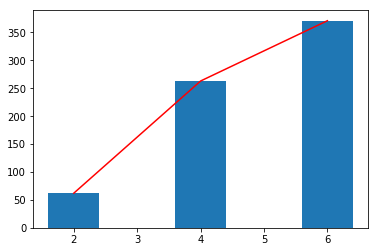

In [299]:
plt.bar([2,4,6],[v2,v4,v6])
plt.plot([2,4,6],[v2,v4,v6],'r')
plt.show()

In [302]:
map_delhi_ir=folium.Map(location=[latitude, longitude], zoom_start=12)

folium.Circle(
        [x[1202],y[1202]],
        radius=6000,
        popup='6 KM Circle Area from Sevilla Neighborhood in New Delhi',
        color='blue',
        key_on=delhi_ir['Neighborhood'],
        fill=True,
        fill_color='yellow',
        fill_opacity=0.2,
        parse_html=False).add_to(map_delhi_ir)
for lat, lng, borough, neighborhood in zip(delhi_ir['Venue Latitude'], delhi_ir['Venue Longitude'], delhi_ir['Venue'], delhi_ir['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        key_on=delhi_ir['Neighborhood'],
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi_ir)
map_delhi_ir

In [ ]:
Rajinder Da Dhaba

In [303]:
x=delhi_ir[delhi_ir['Neighborhood']=='Rajinder Da Dhaba']['Neighborhood Latitude']
y=delhi_ir[delhi_ir['Neighborhood']=='Rajinder Da Dhaba']['Neighborhood Longitude']

In [305]:
x

1670    28.565268
1672    28.565268
1674    28.565268
Name: Neighborhood Latitude, dtype: float64

In [306]:
delhi_venues2['CLat']=x[1670]
delhi_venues2['CLon']=y[1670]

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [307]:
delhi_venues2.head()

Venue  Venue Latitude  Venue Longitude  \
0                 The Imperial       28.625548        77.218664   
1        HOTEL SARAVANA BHAVAN       28.627041        77.219514   
2  The Square, Cafe Coffee Day       28.626640        77.219288   
3              The Spice Route       28.625577        77.218065   
4                         1911       28.625531        77.218715   

             Venue Category       CLat       CLon  
0                     Hotel  28.565268  77.199137  
1   South Indian Restaurant  28.565268  77.199137  
2                      Café  28.565268  77.199137  
3          Asian Restaurant  28.565268  77.199137  
4  Mediterranean Restaurant  28.565268  77.199137

In [308]:
from math import radians, sin, cos, acos
distance=list()
for lat1, lon1, lat2, lon2 in zip(delhi_venues2['CLat'],delhi_venues2['CLon'],delhi_venues2['Venue Latitude'],delhi_venues2['Venue Longitude']):
    slat = radians(lat1)
    slon = radians(lon1)
    elat = radians(lat2)
    elon = radians(lon2)
    dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
    distance.append(dist)


In [309]:
distance=["%.2f" %num for num in distance] 

In [310]:
delhi_venues['Distance From Centre']=distance

In [311]:
delhi_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  The Imperial              28.625548               77.218664   
1  The Imperial              28.625548               77.218664   
2  The Imperial              28.625548               77.218664   
3  The Imperial              28.625548               77.218664   
4  The Imperial              28.625548               77.218664   

                         Venue  Venue Latitude  Venue Longitude  \
0                 The Imperial       28.625548        77.218664   
1        HOTEL SARAVANA BHAVAN       28.627041        77.219514   
2  The Square, Cafe Coffee Day       28.626640        77.219288   
3              The Spice Route       28.625577        77.218065   
4                         1911       28.625531        77.218715   

             Venue Category Distance From Centre  
0                     Hotel                 6.97  
1   South Indian Restaurant                 7.15  
2                      Café                 7.10  
3          Asian Restaurant                 6.96  
4  Mediterranean Restaurant                 6.97

In [312]:
delhi_venues['Distance From Centre']=pd.to_numeric(delhi_venues['Distance From Centre'])

In [313]:
delhi_ir=delhi_venues[delhi_venues['Venue Category'].isin(['Restarant','Indian Restaurant','South Indian Restaurant','Chinese Restaurant','Italian Restaurant'])]

In [314]:
map_delhi_ir=folium.Map(location=[latitude, longitude], zoom_start=12)
for lat, lng, borough, neighborhood in zip(delhi_ir['Venue Latitude'], delhi_ir['Venue Longitude'], delhi_ir['Venue'], delhi_ir['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        key_on=delhi_ir['Neighborhood'],
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi_ir)
map_delhi_ir

In [315]:
delhi_venues_upto2=delhi_ir[delhi_ir['Distance From Centre']<=2.00]

In [316]:
v2=delhi_venues_upto2.groupby('Neighborhood')['Neighborhood'].count().sum()

In [317]:
delhi_venues_upto4=delhi_ir[delhi_ir['Distance From Centre']<=4.00]

In [318]:
v4=delhi_venues_upto4.groupby('Neighborhood')['Neighborhood'].count().sum()

In [319]:
delhi_venues_6more=delhi_ir[delhi_ir['Distance From Centre']<=6.00]

In [320]:
v6=delhi_venues_6more.groupby('Neighborhood')['Neighborhood'].count().sum()

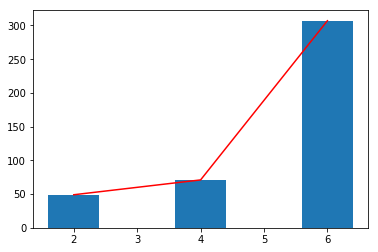

In [321]:
plt.bar([2,4,6],[v2,v4,v6])
plt.plot([2,4,6],[v2,v4,v6],'r')
plt.show()

In [323]:
map_delhi_ir=folium.Map(location=[latitude, longitude], zoom_start=12)

folium.Circle(
        [x[1670],y[1670]],
        radius=6000,
        popup='6 KM Circle Area from Rajinder Da Dhaba Neighborhood in New Delhi',
        color='blue',
        key_on=delhi_ir['Neighborhood'],
        fill=True,
        fill_color='yellow',
        fill_opacity=0.2,
        parse_html=False).add_to(map_delhi_ir)
for lat, lng, borough, neighborhood in zip(delhi_ir['Venue Latitude'], delhi_ir['Venue Longitude'], delhi_ir['Venue'], delhi_ir['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        key_on=delhi_ir['Neighborhood'],
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi_ir)
map_delhi_ir

307